In [2]:
#DS Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix


In [3]:
#importing my data set 
#default credit
defaultcredit = pd.read_csv("defaultcreditcards.csv",header = 1)

In [4]:
defaultcredit

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [5]:
defaultcredit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
defaultcredit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
#this is ike summary() in R
defaultcredit.describe()
#will takecolumn when analyzing

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
defaultcredit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [9]:
#renaming 
#dataname.rename(columns= {"name_of_column":"new_name"}, inplace=True)
defaultcredit.rename(columns={"default payment next month":"default_payment_next_month"}, inplace=True)

In [10]:
defaultcredit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
header = defaultcredit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')


In [12]:
#changin gname of PAY_0 because I want it to be Pay_1
defaultcredit.rename(columns= {"PAY_0":"PAY_1"}, inplace=True)

In [13]:
defaultcredit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [14]:
creditV2 = defaultcredit

In [15]:
creditV2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [16]:
#made a new csv file with updates
creditV2.to_csv(r"C:\Users\Jason\Desktop\Database Analytics\Course 5\Task 3\creditV2.csv")

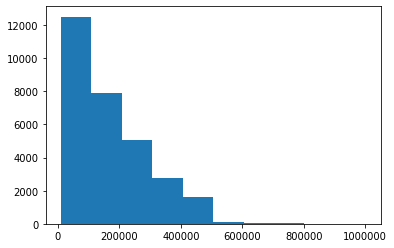

In [17]:
#using matplot.libpyplot to make a histogram
plt.hist(defaultcredit["LIMIT_BAL"])
plt.show()

(array([2.3283e+04, 6.5110e+03, 2.0000e+02, 6.0000e+00]),
 array([  10000.,  257500.,  505000.,  752500., 1000000.]),
 <a list of 4 Patch objects>)

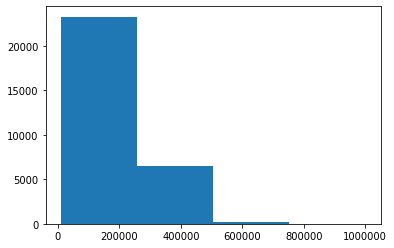

In [18]:
#adding bins to make only 4 groups
plt.hist(defaultcredit["LIMIT_BAL"], bins = 4)

In [19]:
creditV2.groupby("EDUCATION")["EDUCATION"].count()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

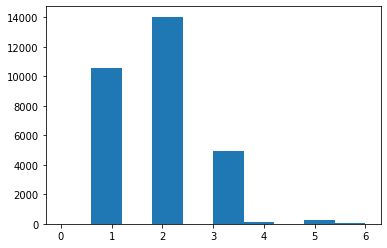

In [20]:
plt.hist(creditV2["EDUCATION"])
plt.show()

In [21]:
creditV2.groupby("AGE")["AGE"].count()

AGE
21      67
22     560
23     931
24    1127
25    1186
26    1256
27    1477
28    1409
29    1605
30    1395
31    1217
32    1158
33    1146
34    1162
35    1113
36    1108
37    1041
38     944
39     954
40     870
41     824
42     794
43     670
44     700
45     617
46     570
47     501
48     466
49     452
50     411
51     340
52     304
53     325
54     247
55     209
56     178
57     122
58     122
59      83
60      67
61      56
62      44
63      31
64      31
65      24
66      25
67      16
68       5
69      15
70      10
71       3
72       3
73       4
74       1
75       3
79       1
Name: AGE, dtype: int64

In [22]:
creditV2.groupby("MARRIAGE")["MARRIAGE"].count()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

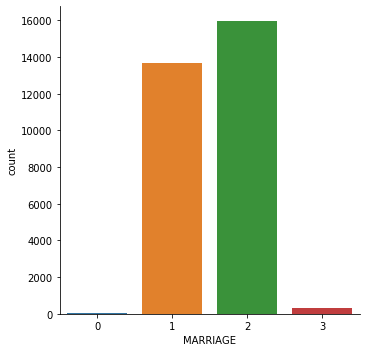

In [23]:
#when it comes to marriage it gives us 4 descriptions 
#we do not know what what the labels are 
sns.catplot("MARRIAGE",data=creditV2,kind="count")


In [24]:
#placing ages in 4 different Age categories based on current Default Market
age_groups = np.array([0,32,43,53])

In [25]:
#arranging my age groups
creditV2['age_groups'] = age_groups.searchsorted(creditV2.AGE)


In [26]:
#i broke down the market age group of 35-52 into two groups 
#the age gaps in the data I had to to not look odd
creditV2.groupby("age_groups")["age_groups"].count()

age_groups
1    13388
2    10626
3     4686
4     1300
Name: age_groups, dtype: int64

In [27]:
#the youngest is 21 so I will skip the 0-18 and do 0-34
creditV2["AGE"].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

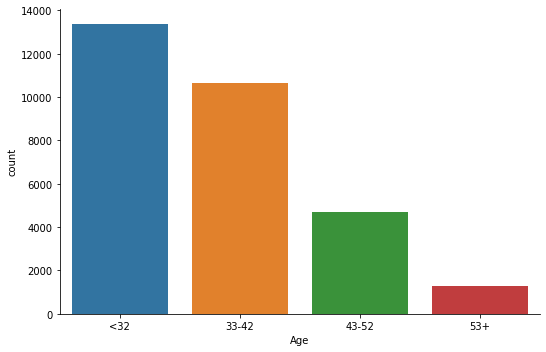

In [28]:
# Histogram Plot of Discretized Age
#I want to break this down even fruther so I will start with the min age of 21
#end with 31 bc 0-34 is too large for my taste
g3 = sns.catplot('age_groups', data=creditV2, kind='count', aspect=1.5)
g3.set_xlabels('Age')
g3.set_xticklabels(['<32', '33-42', '43-52','53+'])

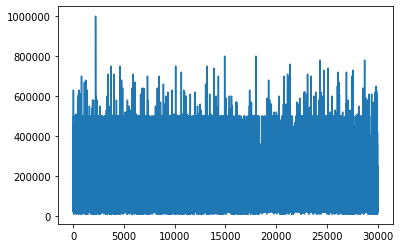

In [29]:
plt.plot(defaultcredit["LIMIT_BAL"])
plt.show()

In [30]:
creditV2["LIMIT_BAL"].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [31]:
# Discretize LIMIT_BAL into 5 bins
# 1: <100k
# 2: 100k-190k
# 3: 200k-290k
# 4: 300-390k
# 5: 400k+
arr_limit = np.array([0,99999,199999,299999,399999,1100000])

In [32]:
#made groups from LIMIT_BAL into the arr_limit set 
creditV2['limit_group'] = arr_limit.searchsorted(creditV2.LIMIT_BAL)
creditV2.groupby("limit_group")["limit_group"].count()

limit_group
1    11450
2     7400
3     6033
4     3042
5     2075
Name: limit_group, dtype: int64

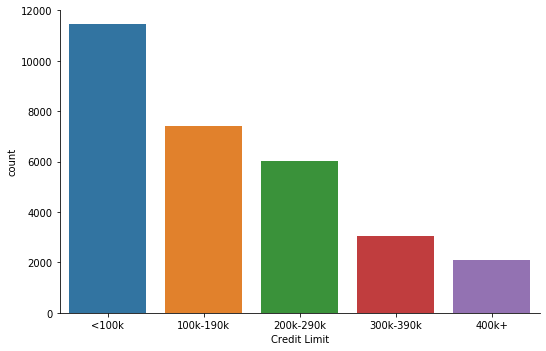

In [33]:
limitplot = sns.catplot('limit_group', data=creditV2, kind='count', aspect=1.5)
limitplot.set_xlabels('Credit Limit')
limitplot.set_xticklabels(['<100k', '100k-190k','200k-290k', 
                    '300k-390k', '400k+'])

In [34]:
#checkin the credit_limit with the age
lim_1 = pd.crosstab(index=[creditV2.AGE], columns=[creditV2.limit_group])
lim_1.columns = [['<100k','100k-190k', '200k-290k', '300-390k', 
                  '400k+']]
lim_1

,<100k,100k-190k,200k-290k,300-390k,400k+
AGE,,,,,
21,67,0,0,0,0
22,541,18,1,0,0
23,790,122,17,1,1
24,831,229,49,13,5
25,726,288,120,38,14
26,590,383,186,75,22
27,582,470,250,132,43
28,430,457,310,141,71
29,473,470,382,176,104


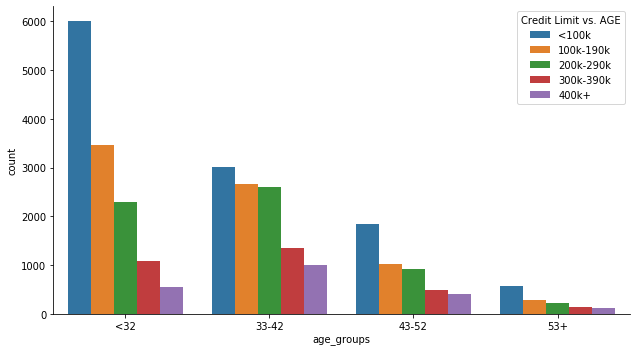

In [35]:
fg_le = sns.catplot('age_groups', data=creditV2, hue='limit_group', 
                 kind='count', aspect=1.75, legend=False)
fg_le.set_xticklabels(['<32', '33-42', '43-52','53+'])
plt.legend(title='Credit Limit vs. AGE', loc='upper right', 
           labels=['<100k', '100k-190k','200k-290k', 
                    '300k-390k', '400k+'])
plt.show(fg_le)

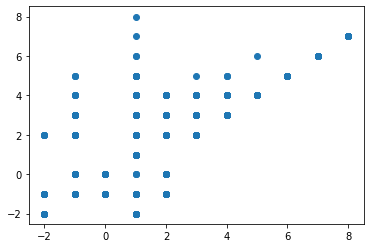

In [36]:
#comparing 2 variales will use x and y for pay_0 and pay_5
#more plots in matplotlib
x= defaultcredit["PAY_1"]
y= defaultcredit["PAY_2"]
plt.scatter(x,y)
plt.show()

In [37]:
header = defaultcredit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month', 'age_groups', 'limit_group'],
      dtype='object')


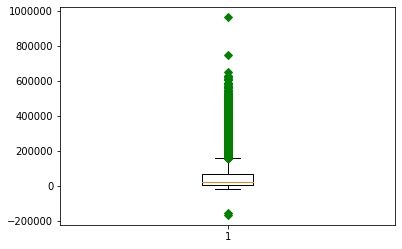

In [38]:
#Box Plots from matplot.lib as plt
A = defaultcredit["BILL_AMT1"]
plt.boxplot(A,0,"gD")
plt.show()

In [39]:
#Covariance used to gauge the linear degree of change between 2 variables.
#measure how changes in one variable are associated w/ changes in 2nd variable
#Correlation using pandas or numpy
credit = defaultcredit.iloc[:,1:25]
credit
covmat= credit.cov()
print(covmat)

                               LIMIT_BAL          SEX     EDUCATION  \
LIMIT_BAL                   1.683446e+10  1571.050630 -22474.028945   
SEX                         1.571051e+03     0.239247      0.005502   
EDUCATION                  -2.247403e+04     0.005502      0.624651   
MARRIAGE                   -7.323670e+03    -0.008014     -0.059184   
AGE                         1.730767e+05    -0.409726      1.275380   
PAY_1                      -3.954593e+04    -0.031685      0.093584   
PAY_2                      -4.603765e+04    -0.041442      0.115025   
PAY_3                      -4.443225e+04    -0.038694      0.107861   
PAY_4                      -4.057181e+04    -0.034411      0.100528   
PAY_5                      -3.667056e+04    -0.030521      0.087340   
PAY_6                      -3.509308e+04    -0.024754      0.074816   
BILL_AMT1                   2.727020e+09 -1211.694332   1372.377644   
BILL_AMT2                   2.570130e+09 -1085.595467   1054.657595   
BILL_A

In [40]:
X=defaultcredit.iloc[:,1:24]
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [41]:
y= defaultcredit["default_payment_next_month"]
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default_payment_next_month, dtype: int64

In [42]:
#cross validation
#this is equal to createdataPartition in R
#y_test is ground truth 
#set.seed(123) = random_state = 123 from R to Python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30)

In [43]:
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
16395,320000,2,1,2,36,0,0,0,0,0,...,28695,19370,10155,3788,5000,5018,1000,3000,0,7013
21448,440000,2,1,2,30,-1,-1,-1,0,0,...,87426,171244,150897,117870,612,87426,130007,3018,15000,51663
20034,160000,2,3,1,44,-2,-2,-2,-2,-2,...,-18,-18,-18,-18,0,0,0,0,0,0
25755,120000,2,2,1,30,0,0,0,0,0,...,104694,103058,71095,47379,3706,5502,4204,3017,2005,1702
1438,50000,1,2,2,54,1,2,0,0,0,...,27168,27585,27910,27380,0,1400,1200,1500,1000,1500


In [44]:
y_train.head()

16395    0
21448    0
20034    0
25755    0
1438     0
Name: default_payment_next_month, dtype: int64

In [52]:
RFClass = RandomForestClassifier(random_state=123,n_estimators=100)
model = RFClass.fit(X_train, y_train)

In [53]:
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [54]:
#this is like predict() <- predict(rfFit,testing) in R
preds = model.predict(X_test)

In [55]:
#this is like postresample in R when predicting y_test 
accuracy = accuracy_score(y_test, preds)

In [56]:
#this is showing our accuracy result
accuracy

0.8155555555555556

In [57]:
#this is showing the confusionMatrix like R
class_report = classification_report(y_test,preds)
print(class_report)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7052
           1       0.62      0.38      0.47      1948

    accuracy                           0.82      9000
   macro avg       0.73      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [51]:
cm = confusion_matrix(y_test,preds)
print(cm)

[[6605  447]
 [1298  650]]
